In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmocean
import gsw as gsw
import matplotlib as mpl
from glob import glob
import pickle


In [2]:
Model=xr.Dataset()
pth = '/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/'
Lat='0n'

for TAG,YRS,LBL in [['OM4_Zstr',[2001,2008],'OM4'],
                    ['OM4_ZStr_MStarCap1p25',[2001,2008],'OM4-ePBLcap'],
                    ['OM4_ZStr_KV0',[2001,2008],'OM4-KV0'],
                    ['OM4up_ZStr_KV0_MStarCap1p25',[2001,2008],'OM4up'],
                    ['OM4up_ZStr225_KV0_MStarCap1p25',[2001,2008],'OM4up 225'],
               ]:
    for i,Lon in enumerate(['165e','170w','140w','110w']):
    

        Zdir  = (pth+TAG)
        model_file=[]
        for Yr in range(YRS[0],YRS[1]+1):
            model_path=Zdir+'/'+str(Yr)+'/'
            print(model_path)
            model_file += [glob(model_path+str(Yr)+'0101.*'+Lat+Lon+'.nc.*')[0]]
        lst=''
        for element in model_file:
            lst+=' '+element
        print(lst)
        Hmod = (xr.open_mfdataset(model_file))

        U_Model = (Hmod.uo).values.squeeze()
        #dU=smooth2d(U_Model)
        Z_Model = Hmod.zl.values
        #dU=np.gradient(dU/100.,Z_Model,axis=1)
        Sx_Model = (Hmod.uo.differentiate(coord='zl')**2).values.squeeze()
        #Approximating N2 from the gradient of sigma_0
        N2_Model = (Hmod.rhopot0.differentiate(coord='zl')).values.squeeze()*9.81/1025
        Zi_Model = Hmod.zi.values
        Kd_Model = (Hmod.Kd_interface).values.squeeze()
        
        Model['Time_'+LBL+'_'+Lon] = Hmod.Time.values
        Model['Z_'+LBL+'_'+Lon] = Z_Model
        Model['U_'+LBL+'_'+Lon] = (('T_'+LBL+'_'+Lon,'Z_'+LBL+'_'+Lon),U_Model)
        Model['Sx_'+LBL+'_'+Lon] = (('T_'+LBL+'_'+Lon,'Z_'+LBL+'_'+Lon),Sx_Model)
        Model['N2_'+LBL+'_'+Lon] = (('T_'+LBL+'_'+Lon,'Z_'+LBL+'_'+Lon),N2_Model)
        Model['Zi_'+LBL+'_'+Lon] = Zi_Model
        Model['Kd_'+LBL+'_'+Lon] = (('T_'+LBL+'_'+Lon,'Zi_'+LBL+'_'+Lon),Kd_Model)


/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_Zstr/2001/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_Zstr/2002/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_Zstr/2003/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_Zstr/2004/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_Zstr/2005/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_Zstr/2006/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_Zstr/2007/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_Zstr/2008/
 /archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_Zstr/2001/20010101.TAO_0n165e.nc.1220 /archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_Zstr/2002/20020101.TAO_0n165e.nc.1220 /archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_Zstr/2003/20030101.TAO_0n165e.nc.1220 /archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_Zstr/2004/2004010

/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_ZStr_MStarCap1p25/2001/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_ZStr_MStarCap1p25/2002/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_ZStr_MStarCap1p25/2003/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_ZStr_MStarCap1p25/2004/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_ZStr_MStarCap1p25/2005/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_ZStr_MStarCap1p25/2006/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_ZStr_MStarCap1p25/2007/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_ZStr_MStarCap1p25/2008/
 /archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_ZStr_MStarCap1p25/2001/20010101.TAO_0n140w.nc.1227 /archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4_ZStr_MStarCap1p25/2002/20020101.TAO_0n140w.nc.1227 /archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/R

/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4up_ZStr_KV0_MStarCap1p25/2001/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4up_ZStr_KV0_MStarCap1p25/2002/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4up_ZStr_KV0_MStarCap1p25/2003/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4up_ZStr_KV0_MStarCap1p25/2004/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4up_ZStr_KV0_MStarCap1p25/2005/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4up_ZStr_KV0_MStarCap1p25/2006/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4up_ZStr_KV0_MStarCap1p25/2007/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4up_ZStr_KV0_MStarCap1p25/2008/
 /archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4up_ZStr_KV0_MStarCap1p25/2001/20010101.TAO_0n165e.nc.1220 /archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4up_ZStr_KV0_MStarCap1p25/2002/20020101.TAO_0n165e.nc.

/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4up_ZStr225_KV0_MStarCap1p25/2001/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4up_ZStr225_KV0_MStarCap1p25/2002/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4up_ZStr225_KV0_MStarCap1p25/2003/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4up_ZStr225_KV0_MStarCap1p25/2004/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4up_ZStr225_KV0_MStarCap1p25/2005/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4up_ZStr225_KV0_MStarCap1p25/2006/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4up_ZStr225_KV0_MStarCap1p25/2007/
/archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4up_ZStr225_KV0_MStarCap1p25/2008/
 /archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4up_ZStr225_KV0_MStarCap1p25/2001/20010101.TAO_0n170w.nc.1223 /archive/bgr/MOM6/Experiments/OceanMixing/OM4_025.JRA/RS2000/OM4up_ZStr225_KV0_MStarCap1p2

In [3]:
Model

<xarray.Dataset>
Dimensions:                (Time_OM4_165e: 35064, Z_OM4_165e: 75, T_OM4_165e: 35064, Zi_OM4_165e: 76, Time_OM4_170w: 35064, Z_OM4_170w: 75, T_OM4_170w: 35064, Zi_OM4_170w: 76, Time_OM4_140w: 35064, Z_OM4_140w: 75, T_OM4_140w: 35064, Zi_OM4_140w: 76, Time_OM4_110w: 35064, Z_OM4_110w: 75, T_OM4_110w: 35064, Zi_OM4_110w: 76, Time_OM4-ePBLcap_165e: 35064, Z_OM4-ePBLcap_165e: 75, T_OM4-ePBLcap_165e: 35064, Zi_OM4-ePBLcap_165e: 76, Time_OM4-ePBLcap_170w: 35064, Z_OM4-ePBLcap_170w: 75, T_OM4-ePBLcap_170w: 35064, Zi_OM4-ePBLcap_170w: 76, Time_OM4-ePBLcap_140w: 35064, Z_OM4-ePBLcap_140w: 75, T_OM4-ePBLcap_140w: 35064, Zi_OM4-ePBLcap_140w: 76, Time_OM4-ePBLcap_110w: 35064, Z_OM4-ePBLcap_110w: 75, T_OM4-ePBLcap_110w: 35064, Zi_OM4-ePBLcap_110w: 76, Time_OM4-KV0_165e: 35064, Z_OM4-KV0_165e: 75, T_OM4-KV0_165e: 35064, Zi_OM4-KV0_165e: 76, Time_OM4-KV0_170w: 35064, Z_OM4-KV0_170w: 75, T_OM4-KV0_170w: 35064, Zi_OM4-KV0_170w: 76, Time_OM4-KV0_140w: 35064, Z_OM4-KV0_140w: 75, T_OM4-KV0_140w: 35064, Zi_OM4-KV0_140w: 76, Time_OM4-KV0_110w: 35064, Z_OM4-KV0_110w: 75, T_OM4-KV0_110w: 35064, Zi_OM4-KV0_110w: 76, Time_OM4up_165e: 35064, Z_OM4up_165e: 75, T_OM4up_165e: 35064, Zi_OM4up_165e: 76, Time_OM4up_170w: 35064, Z_OM4up_170w: 75, T_OM4up_170w: 35064, Zi_OM4up_170w: 76, Time_OM4up_140w: 35064, Z_OM4up_140w: 75, T_OM4up_140w: 35064, Zi_OM4up_140w: 76, Time_OM4up_110w: 35064, Z_OM4up_110w: 75, T_OM4up_110w: 35064, Zi_OM4up_110w: 76, Time_OM4up 225_165e: 35064, Z_OM4up 225_165e: 225, T_OM4up 225_165e: 35064, Zi_OM4up 225_165e: 226, Time_OM4up 225_170w: 35064, Z_OM4up 225_170w: 225, T_OM4up 225_170w: 35064, Zi_OM4up 225_170w: 226, Time_OM4up 225_140w: 35064, Z_OM4up 225_140w: 225, T_OM4up 225_140w: 35064, Zi_OM4up 225_140w: 226, Time_OM4up 225_110w: 35064, Z_OM4up 225_110w: 225, T_OM4up 225_110w: 35064, Zi_OM4up 225_110w: 226)
Coordinates: (12/60)
  * Time_OM4_165e          (Time_OM4_165e) object 2001-01-01 01:00:00 ... 200...
  * Z_OM4_165e             (Z_OM4_165e) float64 1.0 3.0 ... 5.66e+03 6.212e+03
  * Zi_OM4_165e            (Zi_OM4_165e) float64 0.0 2.0 ... 5.925e+03 6.5e+03
  * Time_OM4_170w          (Time_OM4_170w) object 2001-01-01 01:00:00 ... 200...
  * Z_OM4_170w             (Z_OM4_170w) float64 1.0 3.0 ... 5.66e+03 6.212e+03
  * Zi_OM4_170w            (Zi_OM4_170w) float64 0.0 2.0 ... 5.925e+03 6.5e+03
    ...                     ...
  * Time_OM4up 225_140w    (Time_OM4up 225_140w) object 2001-01-01 01:00:00 ....
  * Z_OM4up 225_140w       (Z_OM4up 225_140w) float64 1.0 3.0 ... 6.406e+03
  * Zi_OM4up 225_140w      (Zi_OM4up 225_140w) float64 0.0 2.0 ... 6.5e+03
  * Time_OM4up 225_110w    (Time_OM4up 225_110w) object 2001-01-01 01:00:00 ....
  * Z_OM4up 225_110w       (Z_OM4up 225_110w) float64 1.0 3.0 ... 6.406e+03
  * Zi_OM4up 225_110w      (Zi_OM4up 225_110w) float64 0.0 2.0 ... 6.5e+03
Dimensions without coordinates: T_OM4_165e, T_OM4_170w, T_OM4_140w, T_OM4_110w, T_OM4-ePBLcap_165e, T_OM4-ePBLcap_170w, T_OM4-ePBLcap_140w, T_OM4-ePBLcap_110w, T_OM4-KV0_165e, T_OM4-KV0_170w, T_OM4-KV0_140w, T_OM4-KV0_110w, T_OM4up_165e, T_OM4up_170w, T_OM4up_140w, T_OM4up_110w, T_OM4up 225_165e, T_OM4up 225_170w, T_OM4up 225_140w, T_OM4up 225_110w
Data variables: (12/80)
    U_OM4_165e             (T_OM4_165e, Z_OM4_165e) float32 -0.2794 ... -4.23...
    Sx_OM4_165e            (T_OM4_165e, Z_OM4_165e) float32 1.099e-05 ... 2.3...
    N2_OM4_165e            (T_OM4_165e, Z_OM4_165e) float32 1.11e-05 ... 0.0
    Kd_OM4_165e            (T_OM4_165e, Zi_OM4_165e) float32 0.0 ... 0.0
    U_OM4_170w             (T_OM4_170w, Z_OM4_170w) float32 0.09627 ... 9.119...
    Sx_OM4_170w            (T_OM4_170w, Z_OM4_170w) float32 1.059e-05 ... 6.3...
    ...                     ...
    N2_OM4up 225_140w      (T_OM4up 225_140w, Z_OM4up 225_140w) float32 9.346...
    Kd_OM4up 225_140w      (T_OM4up 225_140w, Zi_OM4up 225_140w) float32 0.0 ...
    U_OM4up 225_110w       (T_OM4up 225_110w, Z_OM4up 225_110w) float32 -0.79...
    Sx_OM4up 225_110w      (

In [4]:
Model.to_netcdf('../Data/ModelBuoy_Outputs.nc')

In [5]:
Model = xr.open_dataset('../Data/ModelBuoy_Outputs.nc')

In [6]:
#Copied here from the Process_Argo_... notebook
# see that notebook for more details.
with open('../Data/TAO_0n_FilesLists.pickle', 'rb') as f:
    [FILENAME_LIST_165e,FILENAME_LIST_170w,FILENAME_LIST_155w,FILENAME_LIST_140w, 
     FILENAME_LIST_125w, FILENAME_LIST_110w, FILENAME_LIST_95w] = pickle.load(
        f)   

def GetProfiles(FILENAME_LIST):
    TTL = 0
    for ii in FILENAME_LIST:
        TTL+=len(ii[1])

    time=list(np.zeros(TTL))

    Z_2d=np.zeros([TTL,1500])+np.NaN
    T_2d=np.zeros([TTL,1500])+np.NaN
    dTdz_2d=np.zeros([TTL,1500])+np.NaN
    S_2d=np.zeros([TTL,1500])+np.NaN
    dSdz_2d=np.zeros([TTL,1500])+np.NaN
    N2_2d=np.zeros([TTL,1500])+np.NaN

    iii=-1
    for ii in FILENAME_LIST:
        with xr.open_dataset(ii[0]) as hndl:
            for p in ii[1]:
                iii+=1
                if (np.mod(iii,100)==0): print(1.*iii/TTL)
                SALTQC = np.array(hndl.PSAL_QC[p,:],dtype=float)
                TEMPQC = np.array(hndl.TEMP_QC[p,:],dtype=float)
                PRESQC = np.array(hndl.PRES_QC[p,:],dtype=float)

                #Computes in-situ density from T&S, T, or S

                #Start with some quality control on the data
                LI = (((SALTQC==1)|(SALTQC==2)|(SALTQC==5)|(SALTQC==8))
                      &
                      ((TEMPQC==1)|(TEMPQC==2)|(TEMPQC==5)|(TEMPQC==8))
                      &
                      ((PRESQC==1)|(PRESQC==2)|(PRESQC==5)|(PRESQC==8)))
                long=hndl.LONGITUDE[p].values
                lat=hndl.LATITUDE[p].values
                Pressure = np.array(hndl.PRES[p,:][LI],dtype=float)
                PSal = np.array(hndl.PSAL[p,:].values[LI],dtype=float)
                dP = Pressure[1]-Pressure[0]
                #PSal = smooth(PSal)
                ASal = gsw.SA_from_SP(PSal,Pressure,long,lat)
                Temp = np.array(hndl.TEMP[p,:].values[LI],dtype=float)
                #Temp = smooth(Temp)
                Rho = gsw.density.rho_t_exact(ASal,Temp,Pressure)
                
                
                
                CT = gsw.conversions.CT_from_rho(Rho,ASal,Pressure)[0]
                Rho0 = gsw.density.rho(ASal,CT,0)

                #Set a zero surface pressure bin
                P_i = np.array([0.]+list(Pressure))

                #First guess at Z_i from pressure
                Z_i = -1.*P_i
                dZ = (Z_i[:-1]-Z_i[1:])
                MULT = np.ones(np.size(dZ))
                MULT[Z_i[1:]<-200]=0
                if (np.nanmin(dZ)<=0 or 
                    np.nanmax(dZ*MULT)>=11 or #checking that upper 200 is 10m resolution
                    np.nanmax(dZ)>=60 or 
                    np.nanmin(Z_i)<-2100
                   ):
                    time[iii]=hndl.JULD[p].values

                else:
                    CT_i = np.array([CT[0]]+list(CT))
                    ASal_i = np.array([ASal[0]]+list(ASal))
                    Rho0_i = np.array([Rho0[0]]+list(Rho0))
                    Rho_i = np.array([Rho[0]]+list(Rho))
                    Pressure_i = np.array([0.,]+list(Pressure))
                    
                    
                    P_c       = 0.5*(P_i[1:]+P_i[:-1])
                    dP        = (P_i[:-1]-P_i[1:])
                    CT_c      = 0.5*(CT_i[1:]+CT_i[:-1])
                    ASal_c    = 0.5*(ASal_i[1:]+ASal_i[:-1])
                    Rho0_c    = 0.5*(Rho0_i[1:]+Rho0_i[:-1])
                    #Get density for layer from mean CT and Psal and central pressure
                    Rho = gsw.density.rho(ASal,CT_c,P_c)
                    #Compute Z_i referenced to a z=0 surface using layer mean density
                    # and assuming hydrostatic pressure
                    for zi in range(len(Rho)):
                        Z_i[zi+1]=Z_i[zi]+1.e4*dP[zi]/(9.81*Rho[zi])
                    Z_c = 0.5*(Z_i[1:]+Z_i[:-1])
                    dZ = (Z_i[:-1]-Z_i[1:])
                    dRho0dz_c = (Rho0_i[...,:-1]-Rho0_i[...,1:])/dZ
                    dCTdz_c = (CT_i[...,:-1]-CT_i[...,1:])/dZ
                    dSdz_c = (ASal_i[...,:-1]-ASal_i[...,1:])/dZ

                    #N2 needs to be computed from rho w/ central pressure.
                    Rho_i_Plo = gsw.density.rho_t_exact(ASal_i[1:],CT_i[1:],Pressure)
                    Rho_i_Pup = gsw.density.rho_t_exact(ASal_i[:-1],CT_i[:-1],Pressure)
                    N2_c = -9.81/1025*(Rho_i_Pup-Rho_i_Plo)/dZ
                    
                    LG = len(Z_c)
                    time[iii]=hndl.JULD[p].values

                    Z_2d[iii,:LG] = Z_c
                    dTdz_2d[iii,:LG] = dCTdz_c
                    T_2d[iii,:LG] = CT_c
                    dSdz_2d[iii,:LG] = dSdz_c
                    S_2d[iii,:LG] = ASal_c
                    N2_2d[iii,:LG] = N2_c
    return time,Z_2d,T_2d,dTdz_2d,S_2d,dSdz_2d,N2_2d



time_165e, Z_2d_165e,T_2d_165e,dTdz_2d_165e,S_2d_165e,dSdz_2d_165e,N2_2d_165e = GetProfiles(FILENAME_LIST_165e)
time_170w, Z_2d_170w,T_2d_170w,dTdz_2d_170w,S_2d_170w,dSdz_2d_170w,N2_2d_170w = GetProfiles(FILENAME_LIST_170w)
time_140w, Z_2d_140w,T_2d_140w,dTdz_2d_140w,S_2d_140w,dSdz_2d_140w,N2_2d_140w = GetProfiles(FILENAME_LIST_140w)
time_110w, Z_2d_110w,T_2d_110w,dTdz_2d_110w,S_2d_110w,dSdz_2d_110w,N2_2d_110w = GetProfiles(FILENAME_LIST_110w)

 
               

0.0
0.07598784194528875
0.1519756838905775
0.22796352583586627
0.303951367781155
0.3799392097264438
0.45592705167173253
0.5319148936170213
0.60790273556231
0.6838905775075987
0.7598784194528876
0.8358662613981763
0.9118541033434651
0.9878419452887538
0.0
0.0846740050804403
0.1693480101608806
0.2540220152413209
0.3386960203217612
0.42337002540220153
0.5080440304826418
0.5927180355630821
0.6773920406435224
0.7620660457239627
0.8467400508044031
0.9314140558848434
0.0
0.07183908045977011
0.14367816091954022
0.21551724137931033
0.28735632183908044
0.35919540229885055
0.43103448275862066
0.5028735632183908
0.5747126436781609
0.646551724137931
0.7183908045977011
0.7902298850574713
0.8620689655172413
0.9339080459770115
0.0
0.06775067750677506
0.13550135501355012
0.2032520325203252
0.27100271002710025
0.33875338753387535
0.4065040650406504
0.4742547425474255
0.5420054200542005
0.6097560975609756
0.6775067750677507
0.7452574525745257
0.8130081300813008
0.8807588075880759
0.948509485094851


In [7]:
# A simple smoothing functions for processing the Argo data
# when it is finer than 2m resolution.
def smooth(A):
    O = np.zeros(np.shape(A))
    for ii in range(len(A)):
        O[ii]=(1*A[max(0,ii-1)]+2*A[ii]+A[min(ii+1,len(A)-1)])/4.
    return O
def REGRID(Z_2d,T_2d,S_2d,DZ):
    REGRID_Z = np.arange(-2000,0.1,DZ)
    TTL=np.shape(Z_2d)[0]
    
    REGRID_T = np.zeros([TTL,len(REGRID_Z)])
    REGRID_S = np.zeros([TTL,len(REGRID_Z)])
    REGRID_dTdz = np.zeros([TTL,len(REGRID_Z)])
    REGRID_dSdz = np.zeros([TTL,len(REGRID_Z)])
    REGRID_N2 = np.zeros([TTL,len(REGRID_Z)])

    for ii in range(TTL):
        REGRID_T[ii,:] = np.interp(REGRID_Z,Z_2d[ii,::-1],T_2d[ii,::-1],left=np.NaN,right=np.NaN)
        REGRID_S[ii,:] = np.interp(REGRID_Z,Z_2d[ii,::-1],S_2d[ii,::-1],left=np.NaN,right=np.NaN)
        rho0 = gsw.density.rho(REGRID_S[ii,:],REGRID_T[ii,:],0)
        REGRID_dTdz[ii,:] = np.gradient(REGRID_T[ii,:],DZ)
        REGRID_dSdz[ii,:] = np.gradient(REGRID_S[ii,:],DZ)
        #N2 is approximated from the gradient of potential
        # temperature to make a fair comparison with model
        # data.
        #print(abs(Z_2d[ii,0]-Z_2d[ii,1]))
        #Argo measurements are usually preprocessed into
        #1db, 2db, or 4db vertical pressure spacing.
        #if it is 1db it is finer than the finest model
        # grid (2m) so for those cases
        # we smooth it with a 1:2:1 filter.
        if (abs(Z_2d[ii,0]-Z_2d[ii,1])<0.8*DZ):
            #print(abs(Z_2d[ii,0]-Z_2d[ii,1]))
            rho0=smooth(rho0)
        REGRID_N2[ii,:] = -np.gradient(rho0,DZ)*9.81/1025.
        
    return REGRID_T,REGRID_S,REGRID_dTdz,REGRID_dSdz, REGRID_N2

# The regridding coordinate spacing
# 2m is chosen as it is the finest resolution of the model output
# we do smoothing on higher resolution Argo data to make it
# more compatible.
dz = 2.
REGRID_T_165e, REGRID_S_165e, REGRID_dTdz_165e, REGRID_dSdz_165e, REGRID_N2_165e = REGRID(Z_2d_165e,T_2d_165e,S_2d_165e,dz)
REGRID_T_170w, REGRID_S_170w, REGRID_dTdz_170w, REGRID_dSdz_170w, REGRID_N2_170w = REGRID(Z_2d_170w,T_2d_170w,S_2d_170w,dz)
REGRID_T_140w, REGRID_S_140w, REGRID_dTdz_140w, REGRID_dSdz_140w, REGRID_N2_140w = REGRID(Z_2d_140w,T_2d_140w,S_2d_140w,dz)
REGRID_T_110w, REGRID_S_110w, REGRID_dTdz_110w, REGRID_dSdz_110w, REGRID_N2_110w = REGRID(Z_2d_110w,T_2d_110w,S_2d_110w,dz)
REGRID_Z = np.arange(-2000,0.1,dz)

            

/tmp/ipykernel_3730061/356599263.py:94: RuntimeWarning: invalid value encountered in true_divide
  DENm_Sx = (np.cumsum(A,axis=1).T/np.sum(A,axis=1)).T#(A/CT)
/tmp/ipykernel_3730061/356599263.py:99: RuntimeWarning: invalid value encountered in true_divide
  DENm_N2 = (np.cumsum(A,axis=1).T/np.sum(A,axis=1)).T#(A/CT)
/tmp/ipykernel_3730061/356599263.py:116: RuntimeWarning: invalid value encountered in true_divide
  DENm0_Sx = (np.cumsum(A,axis=1).T/np.sum(A,axis=1)).T#(A/CT)
/tmp/ipykernel_3730061/356599263.py:121: RuntimeWarning: invalid value encountered in true_divide
  DENm0_N2 = (np.cumsum(A,axis=1).T/np.sum(A,axis=1)).T#(A/CT)
/tmp/ipykernel_3730061/356599263.py:94: RuntimeWarning: invalid value encountered in true_divide
  DENm_Sx = (np.cumsum(A,axis=1).T/np.sum(A,axis=1)).T#(A/CT)
/tmp/ipykernel_3730061/356599263.py:99: RuntimeWarning: invalid value encountered in true_divide
  DENm_N2 = (np.cumsum(A,axis=1).T/np.sum(A,axis=1)).T#(A/CT)
/tmp/ipykernel_3730061/356599263.py:116: R

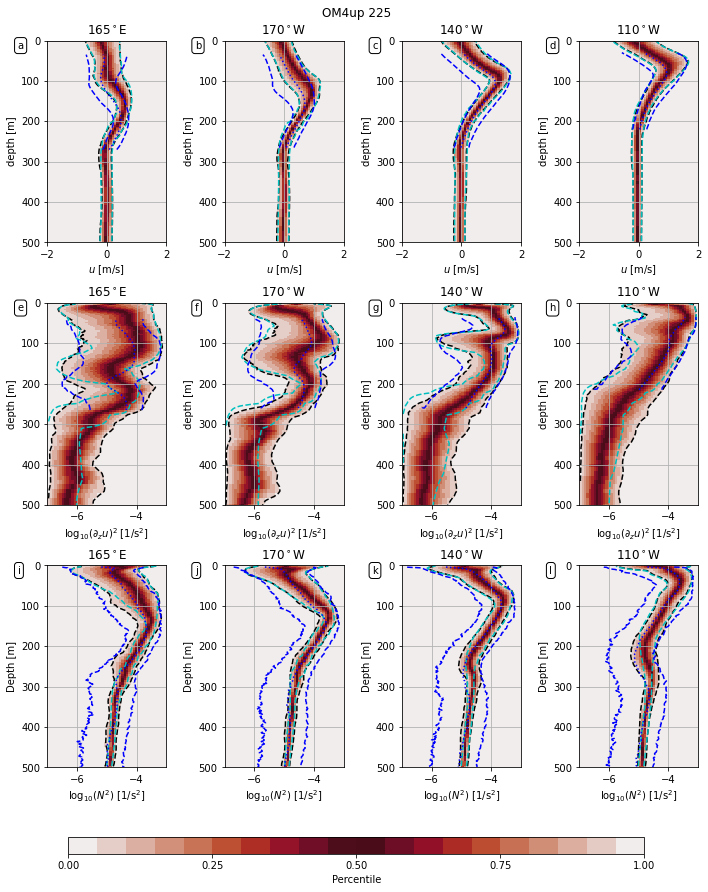

In [8]:
FigNum = 16

fig,AX=plt.subplots(3,4,figsize=(10,12))
colors1 = cmocean.cm.amp(np.linspace(0., 1, 128))
colors2 = cmocean.cm.amp_r(np.linspace(0, 1, 128))
# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
cmap = mpl.colors.LinearSegmentedColormap.from_list('amp2amp_r', colors)
levels=np.linspace(0,1,21)

if FigNum==6:
    LBL = 'OM4'; LBL0 = '' #Generates Figure 6
elif FigNum==11:
    LBL = 'OM4-ePBLcap'; LBL0 = 'OM4' #Generates Figure 11
elif FigNum==13: #Generates Figure 13
    LBL = 'OM4up'; LBL0 = 'OM4'
elif FigNum==16: #Generates Figure 16
    LBL = 'OM4up 225'; LBL0 = 'OM4up'
               
for i,Lon in enumerate(['165e','170w','140w','110w']):
    
    #This block was used to create MeanU utilized below
    tao_path = '/net2/bgr/Data/Mooring/TAO/HiRes/'
    tao_file = glob(tao_path+'adcp'+Lat+Lon+'*')[0]
    Hobs = xr.open_dataset(tao_file).sel(time=slice('2001/01/01','2008/12/31')).isel(lat=0,lon=0)
    U=np.array(Hobs.u_1205.round(decimals=1).values.squeeze(),dtype='float')
    U[abs(U)>1.e3]=np.NaN
    Z=np.array(Hobs.depth.values,dtype='double')
    dU=np.gradient(U/100.,Z,axis=1)
    
    stnd_bins = np.linspace(-2,2,51)
    A = np.zeros([len(Z),len(stnd_bins)-1])
    CT = np.zeros(len(Z))
    for zi in range(len(Z)):
        u = U[:,zi]
        u=u[np.isfinite(u)]
        A[zi,:] = np.histogram(u/100.,stnd_bins)[0]
        CT[zi] = len(u)
    A[CT<(365*24*3),:]=np.nan
    DENo_U = (np.cumsum(A,axis=1).T/CT).T

    stnd_bins2 = np.linspace(-7,-3,51)
    stnd_bins2 = 10**stnd_bins2
    A = np.zeros([len(Z),len(stnd_bins2)-1])
    CT = np.zeros(len(Z))
    
    for zi in range(len(Z)):
        du = dU[:,zi]
        du=du[np.isfinite(du)]
        A[zi,:] = np.histogram(du**2,stnd_bins2)[0]
        CT[zi] = len(du)
    A[CT<(365*24*3),:]=np.NaN
    DENo_Sx = (np.cumsum(A,axis=1).T/np.sum(A,axis=1)).T
    
    if Lon=='165e':
        N2 = REGRID_N2_165e
    elif Lon=='170w':
        N2 = REGRID_N2_170w
    elif Lon=='140w':
        N2 = REGRID_N2_140w
    elif Lon=='110w':
        N2 = REGRID_N2_110w

    TTL = np.shape(N2)[0]

    
    Za = -REGRID_Z
    stnd_bins3 = np.linspace(-7,-3,51)
    stnd_bins3 = 10**stnd_bins3
    A = np.zeros([len(Za),len(stnd_bins3)-1])
    CT = np.zeros(len(Za))
    for zi in range(len(Za)):
        du = N2[:,zi]
        du=du[np.isfinite(du)]
        A[zi,:] = np.histogram(du,stnd_bins3)[0]
        CT[zi] = len(du)
    A[CT<(100),:]=np.NaN
    DENo_N2 = (np.cumsum(A,axis=1).T/np.sum(A,axis=1)).T
    
    Um=Model['U_'+LBL+'_'+Lon]
    Sx=Model['Sx_'+LBL+'_'+Lon]
    N2=Model['N2_'+LBL+'_'+Lon]
    Zm=Model['Z_'+LBL+'_'+Lon]
    CT = Model['Time_'+LBL+'_'+Lon]

    A = np.zeros([Zm.size,len(stnd_bins)-1])
    for zi in range(Zm.size):
        A[zi,:] = np.histogram(Um[:,zi],stnd_bins)[0]
    DENm_U = (np.cumsum(A,axis=1).T/np.sum(A,axis=1)).T#(A/CT)

    A = np.zeros([Zm.size,len(stnd_bins2)-1])
    for zi in range(Zm.size):
        A[zi,:] = np.histogram(Sx[:,zi],stnd_bins2)[0]
    DENm_Sx = (np.cumsum(A,axis=1).T/np.sum(A,axis=1)).T#(A/CT)

    A = np.zeros([Zm.size,len(stnd_bins3)-1])
    for zi in range(Zm.size):
        A[zi,:] = np.histogram(N2[:,zi],stnd_bins3)[0]
    DENm_N2 = (np.cumsum(A,axis=1).T/np.sum(A,axis=1)).T#(A/CT)
    
    if (not LBL0==''):
        Um0=Model['U_'+LBL0+'_'+Lon]
        Sx0=Model['Sx_'+LBL0+'_'+Lon]
        N20=Model['N2_'+LBL0+'_'+Lon]
        Zm0=Model['Z_'+LBL0+'_'+Lon]
        CT0 = Model['Time_'+LBL0+'_'+Lon]
        
        A = np.zeros([Zm0.size,len(stnd_bins)-1])
        for zi in range(Zm0.size):
            A[zi,:] = np.histogram(Um0[:,zi],stnd_bins)[0]
        DENm0_U = (np.cumsum(A,axis=1).T/np.sum(A,axis=1)).T#(A/CT)
        
        A = np.zeros([Zm0.size,len(stnd_bins2)-1])
        for zi in range(Zm0.size):
            A[zi,:] = np.histogram(Sx0[:,zi],stnd_bins2)[0]
        DENm0_Sx = (np.cumsum(A,axis=1).T/np.sum(A,axis=1)).T#(A/CT)

        A = np.zeros([Zm0.size,len(stnd_bins3)-1])
        for zi in range(Zm0.size):
            A[zi,:] = np.histogram(N20[:,zi],stnd_bins3)[0]
        DENm0_N2 = (np.cumsum(A,axis=1).T/np.sum(A,axis=1)).T#(A/CT)

        
    X = 0.5*(stnd_bins[1:]+stnd_bins[:-1])

    ax=AX.ravel()[i]
    Likelihood_M=DENm_U
    c=ax.pcolormesh((X),Zm,Likelihood_M,
                  cmap=cmap,
                  norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                   )
    ax.contour((X),Zm,DENm_U,[0.05,],colors='k',linestyles='--')
    ax.contour((X),Zm,DENm_U,[0.95,],colors='k',linestyles='--')
    if ( not LBL0==''):
        ax.contour((X),Zm0,DENm0_U,[0.05,],colors='c',linestyles='--')
        ax.contour((X),Zm0,DENm0_U,[0.95,],colors='c',linestyles='--')
    ax.contour((X),Z,DENo_U,[0.05,],colors='b',linestyles='--')
    ax.contour((X),Z,DENo_U,[0.5,],colors='b',linestyles=':')
    ax.contour((X),Z,DENo_U,[0.95,],colors='b',linestyles='--')
    ax.set_ylim(500,0)
    ax.set_title(Lon[:-1]+'$^\circ$'+Lon[-1].upper())
    ax.set_ylabel('depth [m]')
    ax.set_xlabel('$u$ [m/s]')
    ax.grid(True)
    ax.set_facecolor(cmocean.cm.amp(0))
    c.cmap.set_bad(cmocean.cm.amp(0))
    
    

    
    X = 0.5*(stnd_bins2[1:]+stnd_bins2[:-1])

    ax=AX.ravel()[i+4]
    
    c=ax.pcolormesh(np.log10(X),Zm,DENm_Sx,
                  cmap=cmap,
                  norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                   )
    ax.contour(np.log10(X),Zm,DENm_Sx,[0.05,],colors='k',linestyles='--')
    ax.contour(np.log10(X),Zm,DENm_Sx,[0.95,],colors='k',linestyles='--')
    if ( not LBL0==''):
        ax.contour(np.log10(X),Zm0,DENm0_Sx,[0.05,],colors='c',linestyles='--')
        ax.contour(np.log10(X),Zm0,DENm0_Sx,[0.95,],colors='c',linestyles='--')
    
    ax.contour(np.log10(X),Z,DENo_Sx,[0.05,],colors='b',linestyles='--')
    ax.contour(np.log10(X),Z,DENo_Sx,[0.5,],colors='b',linestyles=':')
    ax.contour(np.log10(X),Z,DENo_Sx,[0.95,],colors='b',linestyles='--')
    ax.set_ylim(500,0)
    ax.set_title(Lon[:-1]+'$^\circ$'+Lon[-1].upper())
    ax.set_ylabel('depth [m]')
    ax.set_xlabel('$\log_{10}(\partial_z u)^2$ [1/s$^2$]')
    ax.grid(True)
    ax.set_facecolor(cmocean.cm.amp(0))
    c.cmap.set_bad(cmocean.cm.amp(0))
    

    

    X = 0.5*(stnd_bins3[1:]+stnd_bins3[:-1])

    ax=AX.ravel()[i+8]
    
    c=ax.pcolormesh(np.log10(X),Zm,DENm_N2,
                  cmap=cmap,
                  norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                   )
    ax.contour(np.log10(X),Zm,DENm_N2,[0.05,],colors='k',linestyles='--')
    ax.contour(np.log10(X),Zm,DENm_N2,[0.95,],colors='k',linestyles='--')
    if ( not LBL0==''):
        ax.contour(np.log10(X),Zm0,DENm0_N2,[0.05,],colors='c',linestyles='--')
        ax.contour(np.log10(X),Zm0,DENm0_N2,[0.95,],colors='c',linestyles='--')
    
    ax.contour(np.log10(X),Za,DENo_N2,[0.05,],colors='b',linestyles='--')
    ax.contour(np.log10(X),Za,DENo_N2,[0.5,],colors='b',linestyles=':')
    ax.contour(np.log10(X),Za,DENo_N2,[0.95,],colors='b',linestyles='--')

    ax.set_ylim(500,0)
    ax.grid(True)
    ax.set_ylabel('Depth [m]')
    #axt.set_xticklabels('')
    ax.set_xlabel('$\log_{10}(N^2)$ [1/s$^2$]')
    
    ax.set_title(Lon[:-1]+'$^\circ$'+Lon[-1].upper())
    
    
fig.suptitle(LBL)
fig.tight_layout()
fig.subplots_adjust(bottom=0.1)
axcb=fig.add_axes([0.1,0.00,0.8,0.02])
cb=plt.colorbar(c,cax=axcb,orientation='horizontal')
cb.set_ticks([0,0.25,0.5,0.75,1])
cb.set_label('Percentile')

for AXi in range(0,4):
    txt='abcdefghijklmnopqrstuvwyxz'[AXi]
    AX.ravel()[AXi].text(-3,20,txt,bbox=dict(boxstyle='round', facecolor='white'))
for AXi in range(4,12):
    txt='abcdefghijklmnopqrstuvwyxz'[AXi]
    AX.ravel()[AXi].text(-8,20,txt,bbox=dict(boxstyle='round', facecolor='white'))

fig.savefig('../Fig/'+LBL+'_CDF.png',dpi=200,bbox_inches = "tight")
        
